# Missing data, feature engineer

We are going to fix the 34 predictors that have missing values in this area. We will go over them one by one, starting with the most common NAs and working our way down until we’ve repaired them all. If we come across a variable that is part of a group with other variables, we shall treat them as a unit. Pool, Garage, and Basement, for example, each have a number of variations.

We turned character variables into ordinal integers if there is evident ordinality, or into factors if levels are categories without ordinality, in addition to ensuring that NAs are handled. We’ll use one-hot encoding to transform these factors to numbers later (using the model.matrix function).

## BuildingCategory

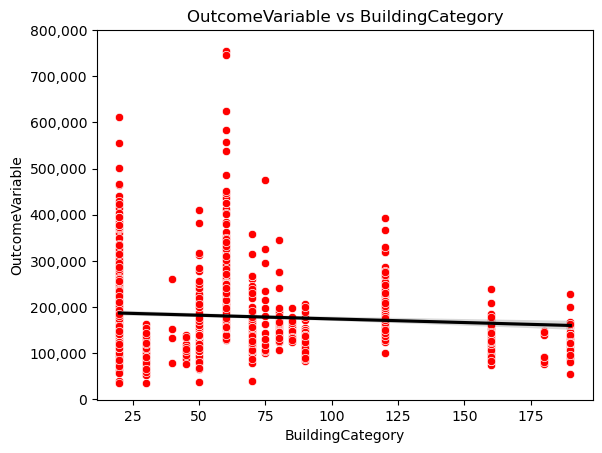

In [14]:
x='BuildingCategory'
y='OutcomeVariable'
scatt(x,y)

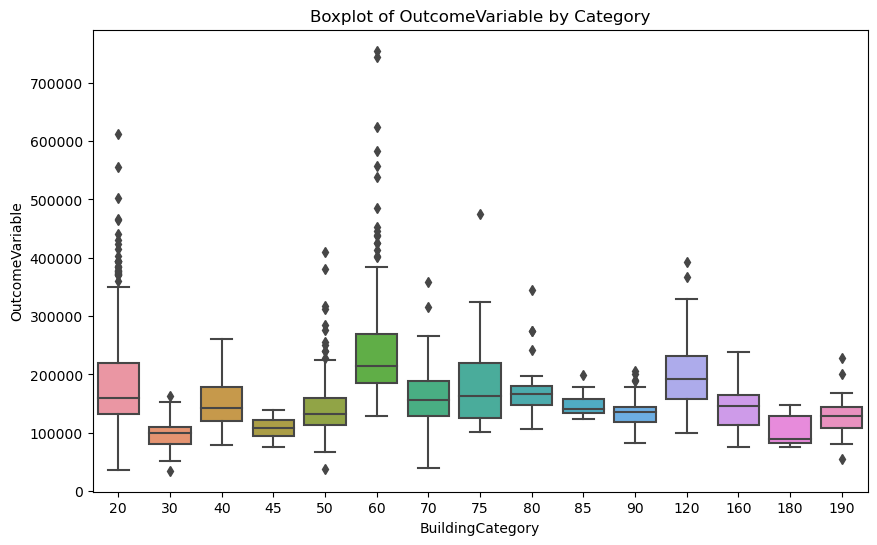

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BuildingCategory', y='OutcomeVariable', data=data)
plt.title('Boxplot of OutcomeVariable by Category')
plt.show()

In [16]:
building_category_mapping = {
    60: 'A',
    20: 'B',
    70: 'C',
    50: 'D',
    190: 'E',
    45: 'F',
    90: 'G',
    120: 'H',
    30: 'I',
    85: 'J',
    80: 'K',
    160: 'L',
    75: 'M',
    180: 'N',
    40: 'O'
}
# Apply the mapping
data['BuildingCategory'] = data['BuildingCategory'].map(building_category_mapping)


We found that BuildingCategory negatively impacts the performance of the model due to misleading ordinal implications,so we can convert it to categorical data .
By doing this we have removed the unintended ordinal relationship.

## StreetLineLength

259 NAs. The most reasonable imputation seems to take the median per District.

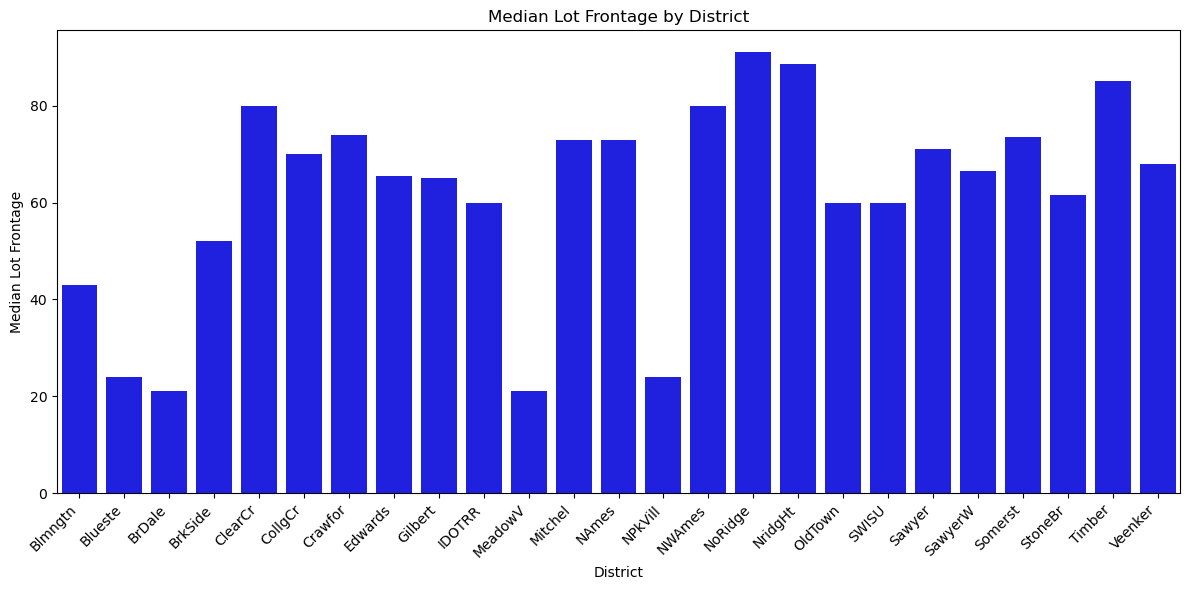

In [17]:
df_filtered = data.dropna(subset=['StreetLineLength'])

# Calculate median StreetLineLength for each District
median_street_length = df_filtered.groupby('District')['StreetLineLength'].median().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='District', y='StreetLineLength', data=median_street_length, color='blue')

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

# Add labels and title if necessary
plt.xlabel('District')
plt.ylabel('Median Lot Frontage')
plt.title('Median Lot Frontage by District')

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
median_street_length = data.groupby('District')['StreetLineLength'].transform('median')
# Fill NaN values in the StreetLineLength column with the corresponding district median
data['StreetLineLength'] = data['StreetLineLength'].fillna(median_street_length)

## AlleyAccessType

the values are not ordinal

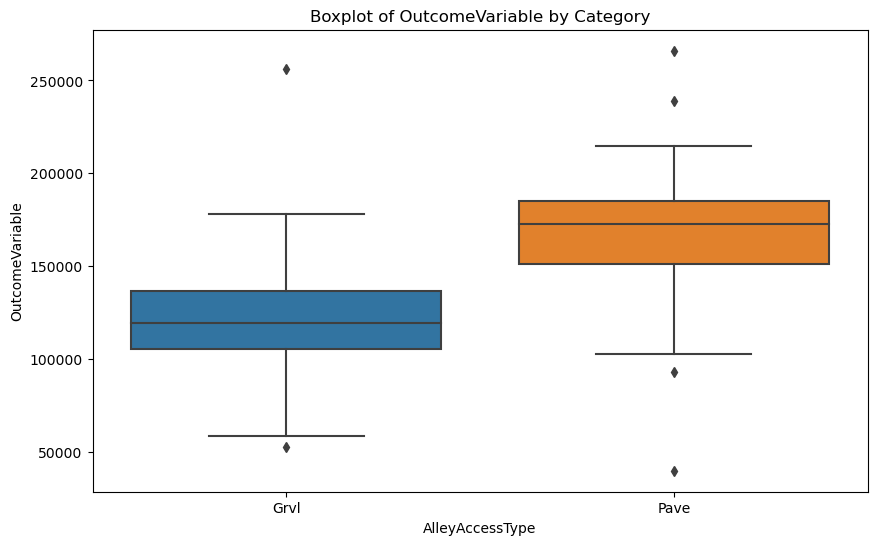

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='AlleyAccessType', y='OutcomeVariable', data=data)
plt.title('Boxplot of OutcomeVariable by Category')
plt.show()

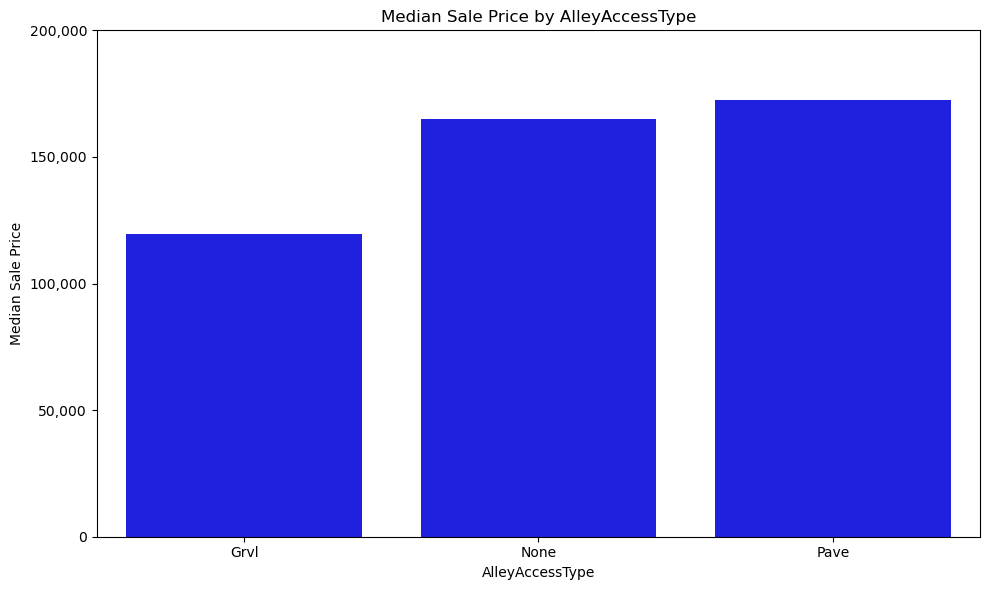

In [20]:
from matplotlib.ticker import FuncFormatter

data['AlleyAccessType'] = data['AlleyAccessType'].fillna('None').astype('category')

# Filter out rows where OutcomeVariable is NaN
data_filtered = data.dropna(subset=['OutcomeVariable'])

# Calculate median OutcomeVariable for each AlleyAccessType category
median_sale_price_by_AlleyAccessType = data_filtered.groupby('AlleyAccessType')['OutcomeVariable'].median().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='AlleyAccessType', y='OutcomeVariable', data=median_sale_price_by_AlleyAccessType, color='blue')

# Customize y-axis to show breaks at 0, 50000, 100000, 150000, 200000
plt.yticks(ticks=range(0, 200001, 50000))

# Add labels and title if necessary
plt.xlabel('AlleyAccessType')
plt.ylabel('Median Sale Price')
plt.title('Median Sale Price by AlleyAccessType')

# Function to format y-axis labels with commas
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.tight_layout()
plt.show()

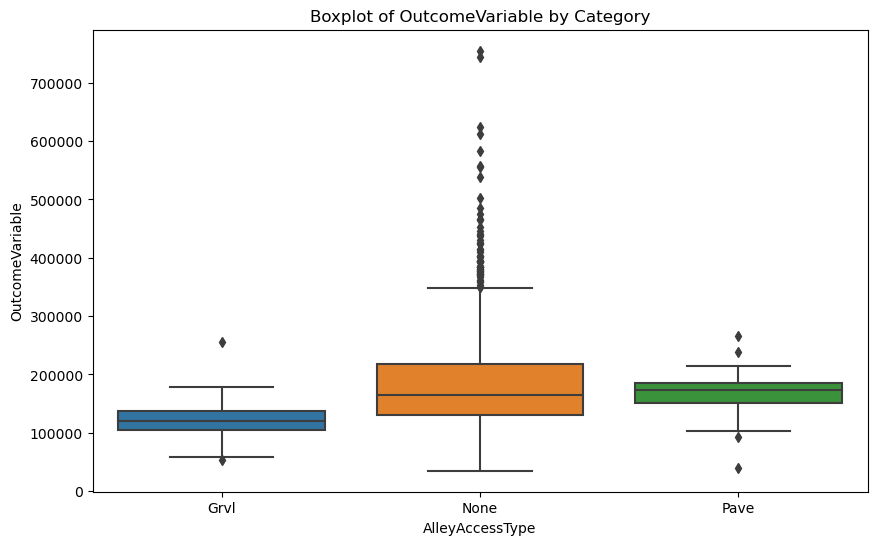

In [21]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='AlleyAccessType', y='OutcomeVariable', data=data)
plt.title('Boxplot of OutcomeVariable by Category')
plt.show()

## MasonrySize

we have noticed that when th Masonrytype is equal to zero the masonry size is nan

In [27]:
h=data[['MasonryType', 'MasonrySize']]
h=h[h['MasonryType'].isna()]

In [29]:
h

,MasonryType,MasonrySize
1,NaN,0.0
3,NaN,0.0
5,NaN,0.0
8,NaN,0.0
9,NaN,0.0
...,...,...
1454,NaN,0.0
1455,NaN,0.0
1457,NaN,0.0
1458,NaN,0.0


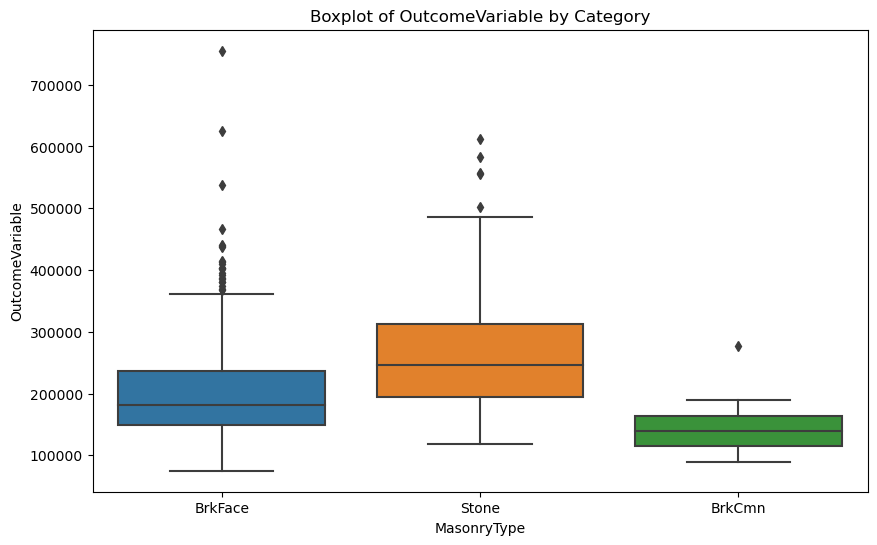

In [ ]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='MasonryType', y='OutcomeVariable', data=data)
plt.title('Boxplot of OutcomeVariable by Category')
plt.show()

we do not notice any ordinal relationship

In [ ]:
# Fill NaN values in MasonryType with 'None' where MasonrySize is 0.0
data.loc[(data['MasonrySize'] == 0.0) & (data['MasonryType'].isna()), 'MasonryType'] = 'None'

still some nan in both so we fill it with mean and median

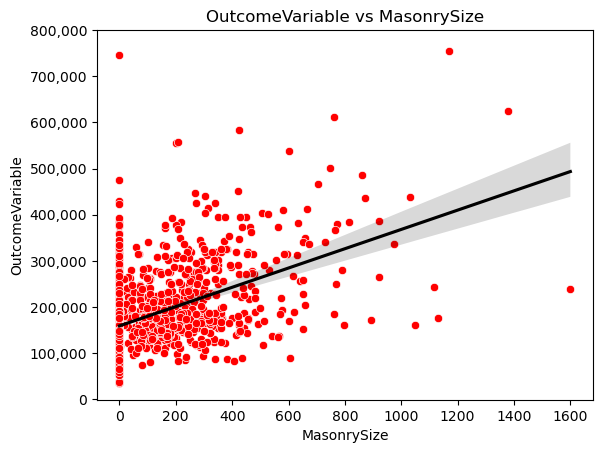

In [ ]:
scatt('MasonrySize','OutcomeVariable')

## Basement columns

We have noticed that if the TotalBasementArea is 0 than there is no basment in the house

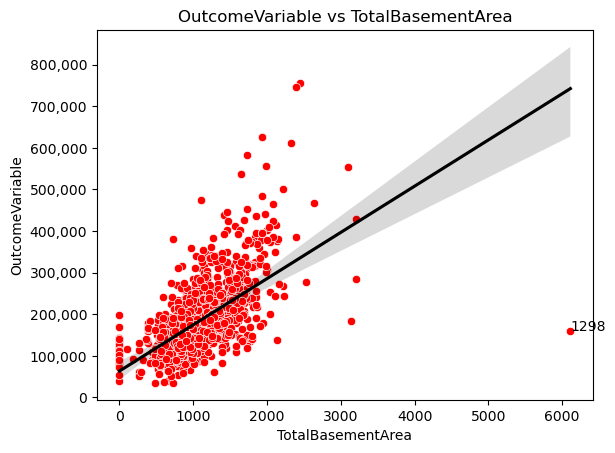

In [ ]:
scatt('TotalBasementArea','OutcomeVariable')

the house with really big bassment area and low OutcomeVariable seem outliers (house 1298, see labels in graph). 
we will not take them out yet, as taking outliers can be dangerous. For instance, a low score on the MaterialQuality could explain a low price. However, as we can see below, this house actually also score maximum points on Material Quality (6). Therefore, we will keep the house 1298 in mind as prime candidates to take out as outliers.

In [ ]:
columns_to_fill = {
    'BasementHeight': 'NA',
    'BasementCondition': 'NA',
    'BasementAccess': 'NA',
    'BasementFinish1': 'NA',
    'BasementFinishedArea1': 0.0,
    'BasementFinish2': 'NA'
}

# Fill the missing values for rows where TotalBasementArea is 0
for column, value in columns_to_fill.items():
    data.loc[data['TotalBasementArea'] == 0, column] = value

In [ ]:
columns_to_fill_mode = ['BasementAccess', 'BasementFinish2']

for column in columns_to_fill_mode:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

we have decided two add up the two column into one

In [ ]:
data['BasementBathrooms']=data['BasementFullBathrooms'] + data['BasementHalfBathrooms']

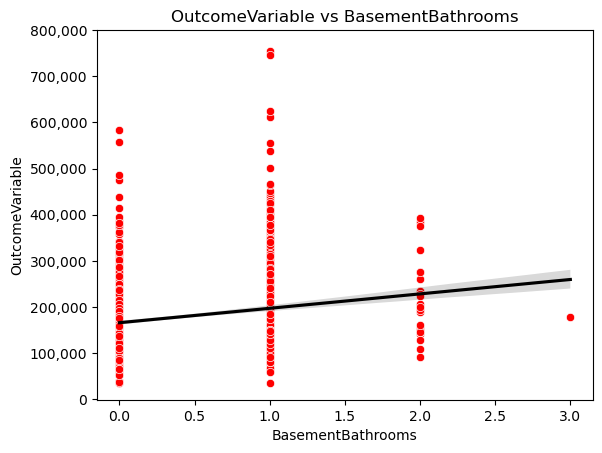

In [ ]:
scatt('BasementBathrooms','OutcomeVariable')

there may be some sort of ordinal relationship , we may consider it we may not

## PoolQuality PoolSize

The PoolQC is the variable with most NAs (1453) 

In [32]:
h=data[['PoolQuality', 'PoolSize']]
h=h[h['PoolQuality'].isna()]

In [33]:
h

,PoolQuality,PoolSize
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
...,...,...
1455,NaN,0
1456,NaN,0
1457,NaN,0
1458,NaN,0


when size is 0 the quality is alo nan , which make sence not every house have pool in it , but when it have the pricr shoots .
it is obvious that we need to just assign ‘No Pool’ to the NAs.

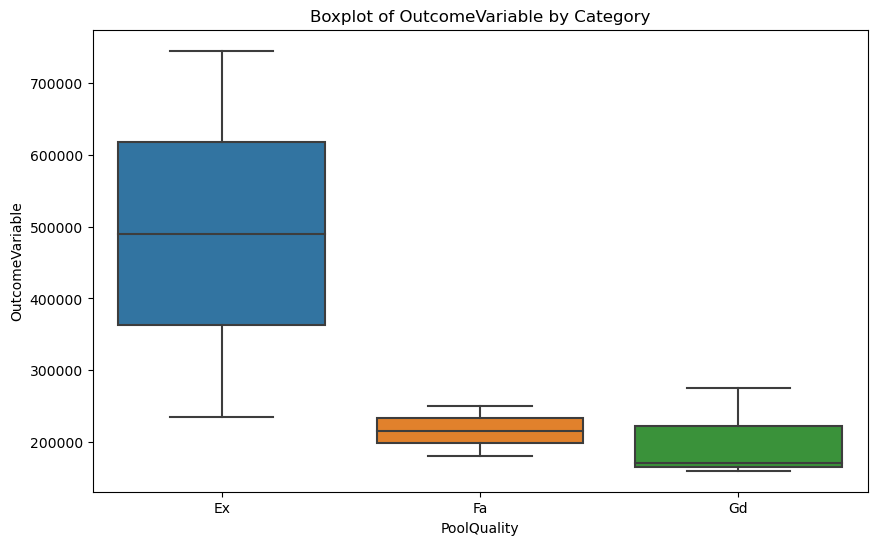

In [35]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='PoolQuality', y='OutcomeVariable', data=data)
plt.title('Boxplot of OutcomeVariable by Category')
plt.show()

we notice some kinde of ordialaty 

notice we thought of an approach as follows : if we label quality ordinaly and multiply it wit the size in deffrent column we may have better performance 

## FenceQuality

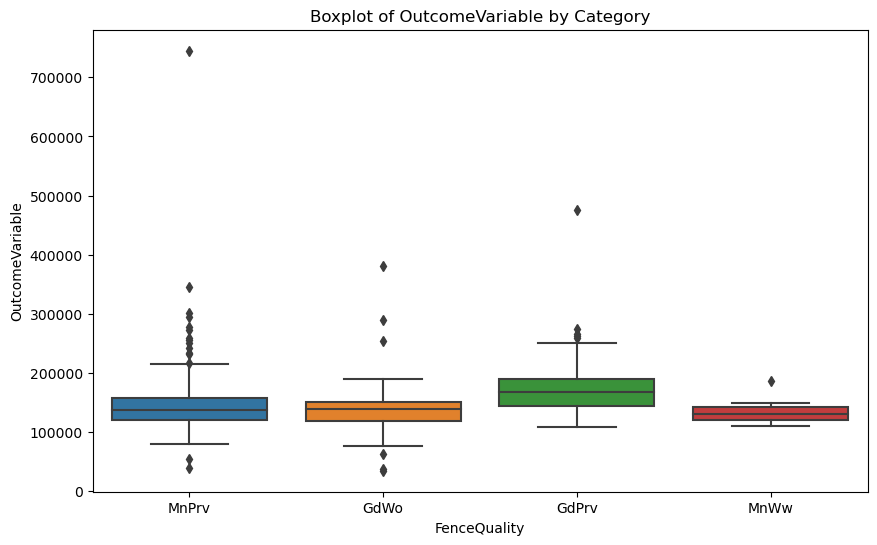

In [36]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='FenceQuality', y='OutcomeVariable', data=data)
plt.title('Boxplot of OutcomeVariable by Category')
plt.show()

we may drop this column since it does not indicates any thing

## Fireplace variables

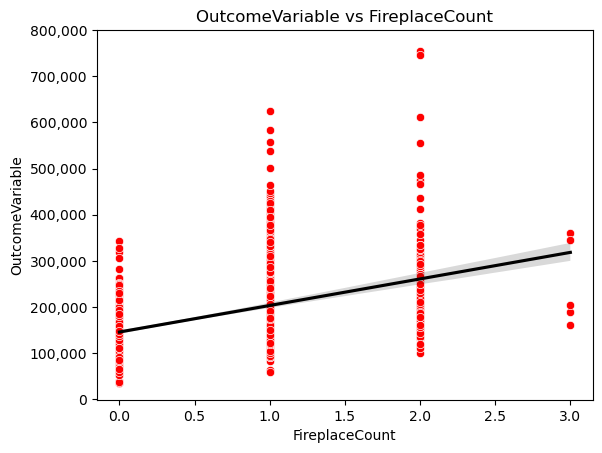

In [40]:
scatt('FireplaceCount','OutcomeVariable')

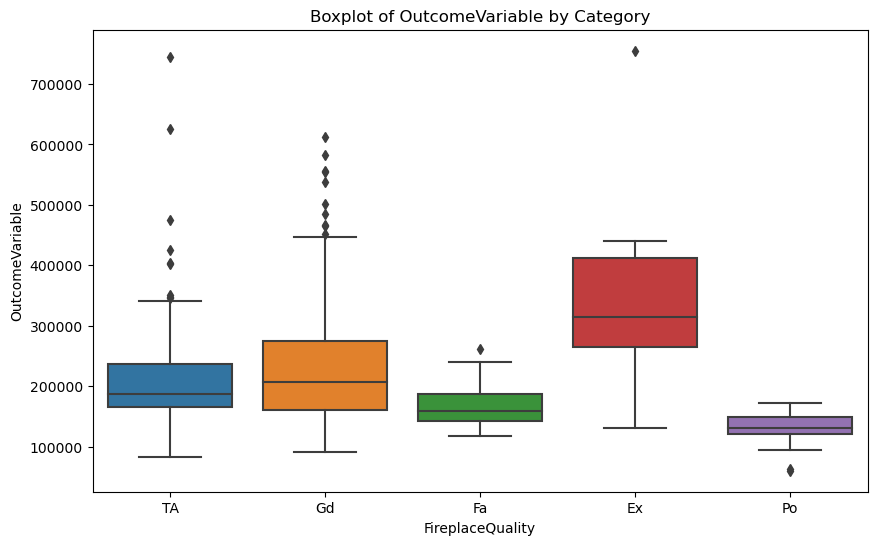

In [41]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='FireplaceQuality', y='OutcomeVariable', data=data)
plt.title('Boxplot of OutcomeVariable by Category')
plt.show()

ordinal

In [42]:
h=data[['FireplaceCount', 'FireplaceQuality']]
h=h[h['FireplaceCount'] == 0]

In [43]:
h

,FireplaceCount,FireplaceQuality
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
...,...,...
1452,0,NaN
1453,0,NaN
1454,0,NaN
1458,0,NaN


## Garage variables

We have noticed that if the GarageSize is 0 than there is no garage in the property

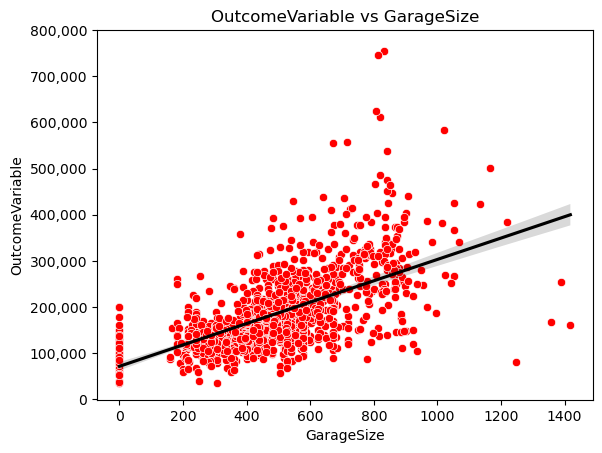

In [45]:
scatt('GarageSize','OutcomeVariable')

## sale year constraction year sale month

we will drop month since it helps nothing 

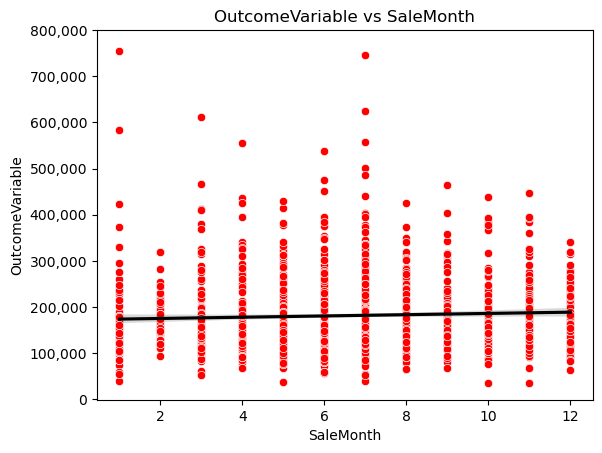

In [50]:
scatt('SaleMonth','OutcomeVariable')

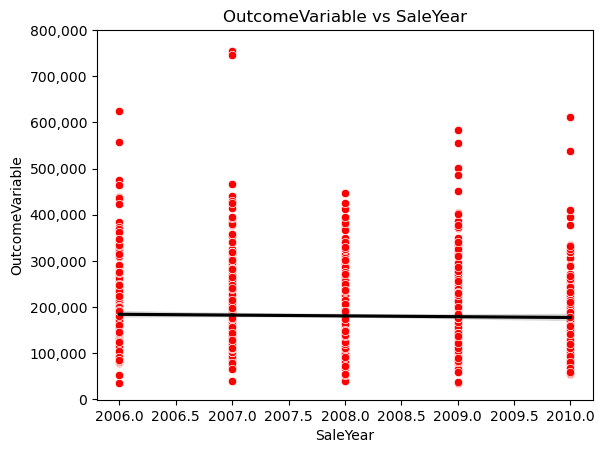

In [51]:
scatt('SaleYear','OutcomeVariable')

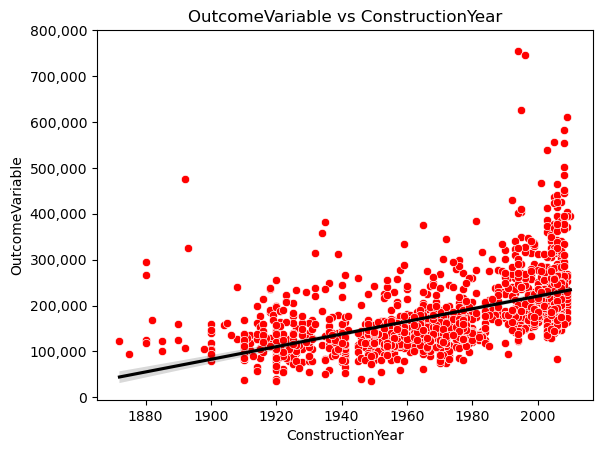

In [52]:
scatt('ConstructionYear','OutcomeVariable')

we thought of substracting SaleYear and ConstructionYear in new column called house age

In [53]:
data['age'] = data['SaleYear'] - data['ConstructionYear'] 

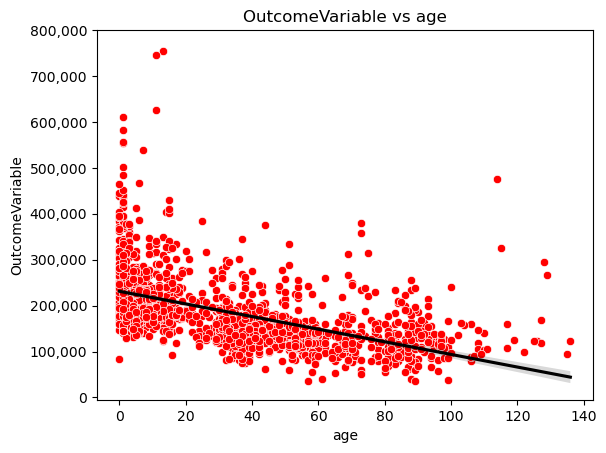

In [54]:
scatt('age','OutcomeVariable')

seams to be a vaild approach , some outlayers here and there but we can deal with them later

# Columns Dropped

we noticed a strong correlation between "GarageConstructionYear" and "ConstructionYear" so we opted to leave the more meaningful attribute in our features

we also did a groupby['AdditionalFeature' , 'AdditionalFeatureValue'] and noticed there's little to no relation with heavy arbitrary values so we opted to remove the 'AdditionalFeatureValue'

# Performing outliers detection

In [3]:
df = pd.read_csv('train.csv')

In [4]:
# Calculate the 4th and 96th percentiles
Q1 = df.quantile(0.04)
Q3 = df.quantile(0.96)
IQR = Q3 - Q1

# Define the bounds for outliers
max_value = Q3 + 1.5 * IQR  # Upper bound for outliers
min_value = Q1 - 1.5 * IQR  # Lower bound for outliers

# Detect outliers
outliers_mask = (df < min_value) | (df > max_value)

# Remove outliers from the DataFrame
df_no_outliers = df[~outliers_mask.any(axis=1)].reset_index(drop=True)

# Count the total number of outliers for each variable
total_outliers = outliers_mask.sum()

# Display results
print("Total outliers for each variable:")
print(total_outliers)
print("Total outliers:", total_outliers.sum())


Total outliers for each variable:
AdditionalFeature          0
AdditionalFeatureValue    52
AirConditioning            0
AlleyAccessType            0
BasementAccess             0
                          ..
TotalRooms                 0
UpperFloorArea             0
UtilityAvailability        0
WoodDeckArea               0
ZoningClassification       0
Length: 81, dtype: int64
Total outliers: 140


C:\Users\Omar\AppData\Local\Temp\ipykernel_2312\800733754.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_mask = (df < min_value) | (df > max_value)


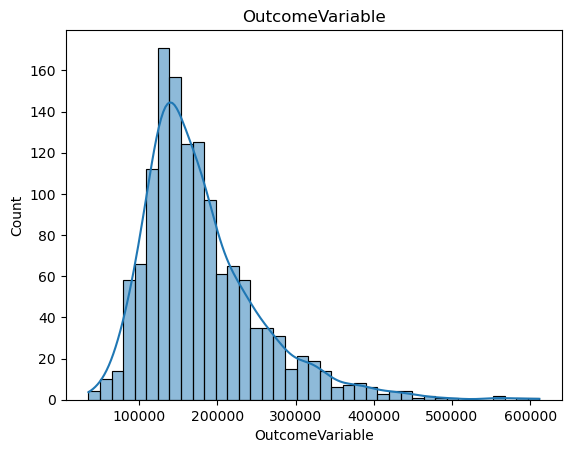

In [5]:
sns.histplot(df_no_outliers['OutcomeVariable'], kde=True)
plt.title('OutcomeVariable')
plt.show()